In [191]:
import pandas as pd
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config

In [2]:
df = pd.read_csv('../data/sabancaya/hotspot-data/S2_HotSpot_Sabancaya/S2_HotSpot_Sabancaya.csv')
df.set_index('Date', inplace=True)
df

,N Hot Pixel,meanTI,maxTI,maxDist,maxDist Summit,N Hot Pixel Summit,N Cluster
Date,,,,,,,
03-Sep-2015 14:57:11,0,NaN,NaN,NaN,NaN,0,0
02-Dec-2015 15:09:33,0,NaN,NaN,NaN,NaN,0,0
01-Jan-2016 15:09:22,2,0.780950,0.8445,60.000000,60.000000,2,2
01-Mar-2016 15:02:41,0,NaN,NaN,NaN,NaN,0,0
31-Mar-2016 14:59:54,0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
04-Mar-2024 15:07:19,11,1.503164,1.8923,233.238076,233.238076,11,3
09-Mar-2024 15:07:23,0,NaN,NaN,NaN,NaN,0,0
14-Mar-2024 15:07:21,0,NaN,NaN,NaN,NaN,0,0


In [151]:
def get_year(date_str):
    year = date_str[7:11]
    return int(year)

def get_month(date_str):
    return date_str[3:11]

def check_different_month(date_str):
    return df.index.get_loc(date_str) == 0 or get_month(df.index[df.index.get_loc(date_str)]) != get_month(df.index[df.index.get_loc(date_str) - 1])

def check_different_year(date_str):
    return df.index.get_loc(date_str) == 0 or get_year(df.index[df.index.get_loc(date_str)]) != get_year(df.index[df.index.get_loc(date_str) - 1])

In [155]:
def monthly_avg(var):
    A = {}
    for date_str in df.index:
        if(check_different_month(date_str)):
            var_list = [df[var][date_str]]
            c = 1
            m0 = get_month(date_str)
            m1 = get_month(df.index[df.index.get_loc(date_str) + c])
            while(m1 == m0):
                var_list.append(df[var][df.index[df.index.get_loc(date_str) + c]])
                if(df.index.get_loc(date_str)+c == len(df)-1):
                    break
                else:
                    m1 = get_month(df.index[df.index.get_loc(date_str) + c+1])
                    c += 1
            A[m0] = np.nanmean(var_list)
    monthly_avgs = pd.Series(A)
    return monthly_avgs

In [156]:
def yearly_avg(var):
    A = {}
    for date_str in df.index:
        if(check_different_year(date_str)):
            var_list = [df[var][date_str]]
            c = 1
            y0 = get_year(date_str)
            y1 = get_year(df.index[df.index.get_loc(date_str) + c])
            while(y1 == y0):
                var_list.append(df[var][df.index[df.index.get_loc(date_str) + c]])
                if(df.index.get_loc(date_str)+c == len(df)-1):
                    break
                else:
                    y1 = get_year(df.index[df.index.get_loc(date_str) + c+1])
                    c += 1
            A[y0] = np.nanmean(var_list)
    yearly_avgs = pd.Series(A)
    return yearly_avgs

C:\Users\sahny\AppData\Local\Temp\ipykernel_11360\2781870292.py:16: RuntimeWarning: Mean of empty slice
  A[m0] = np.nanmean(var_list)


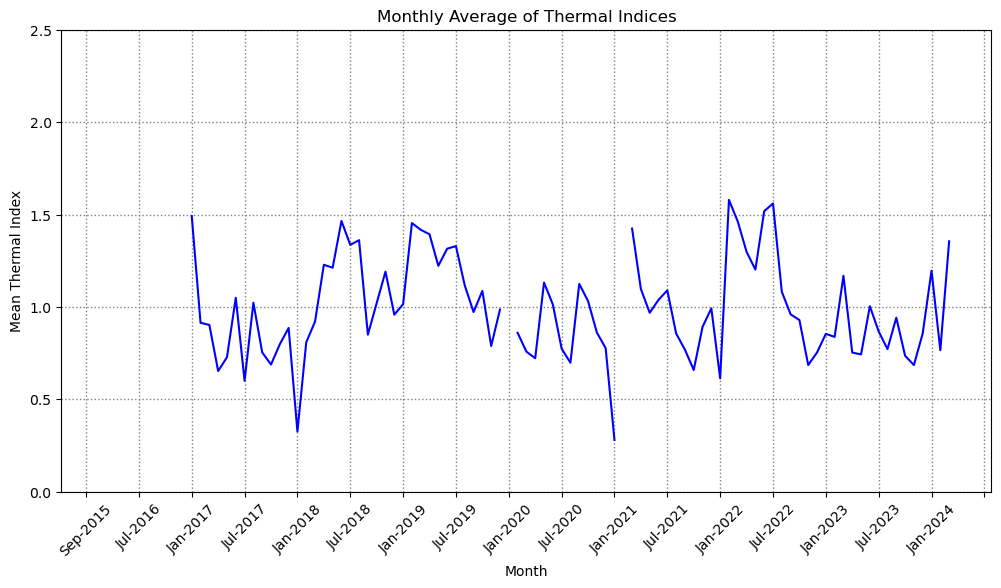

In [202]:
plt.figure(figsize=(12,6))
plt.plot(monthly_avg('meanTI'), c='b')
plt.title('Monthly Average of Thermal Indices')
plt.xticks(rotation=45)
plt.ylim(0.0, 2.5)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Mean Thermal Index')
plt.grid(color='gray', lw=1, ls='dotted')
plt.savefig('../figures/TI-monthly-avg.png', bbox_inches='tight')
plt.show()

C:\Users\sahny\AppData\Local\Temp\ipykernel_11360\1624657053.py:16: RuntimeWarning: Mean of empty slice
  A[y0] = np.nanmean(var_list)


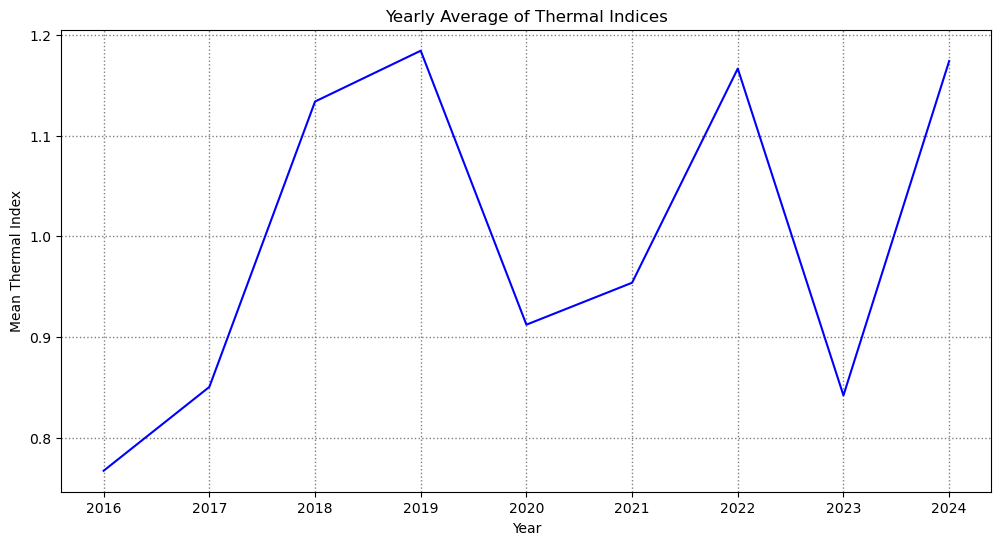

In [192]:
plt.figure(figsize=(12,6))
plt.plot(yearly_avg('meanTI'), c='b')
plt.title('Yearly Average of Thermal Indices')
plt.xlabel('Year')
plt.ylabel('Mean Thermal Index')
plt.grid(color='gray', lw=1, ls='dotted')
plt.show()

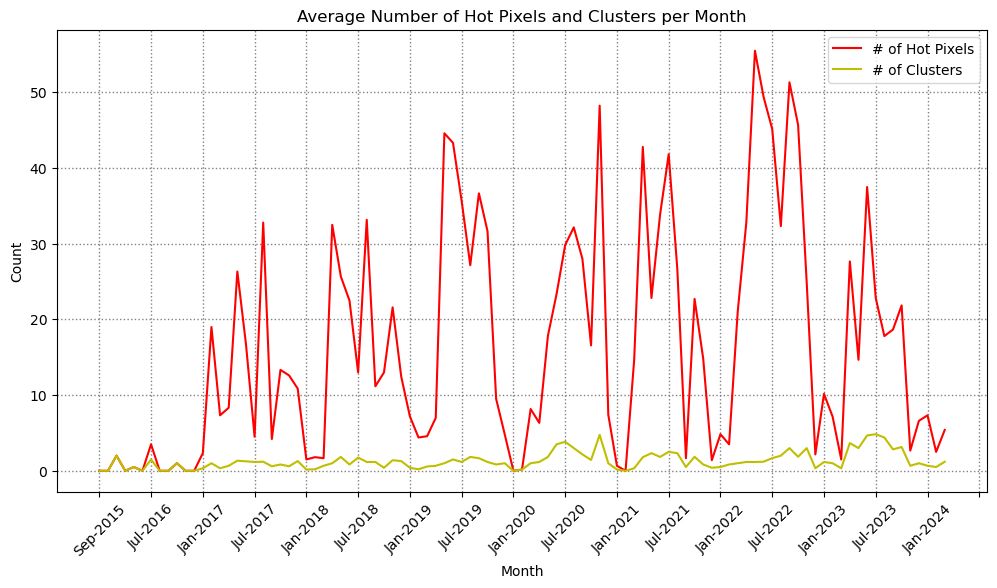

In [203]:
plt.figure(figsize=(12,6))
plt.plot(monthly_avg('N Hot Pixel'), c='r', label='# of Hot Pixels')
plt.plot(monthly_avg('N Cluster'), c='y', label='# of Clusters')
plt.title('Average Number of Hot Pixels and Clusters per Month')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(color='gray', lw=1, ls='dotted')
plt.legend()
plt.savefig('../figures/HotPixels-monthly-avg.png', bbox_inches='tight')
plt.show()

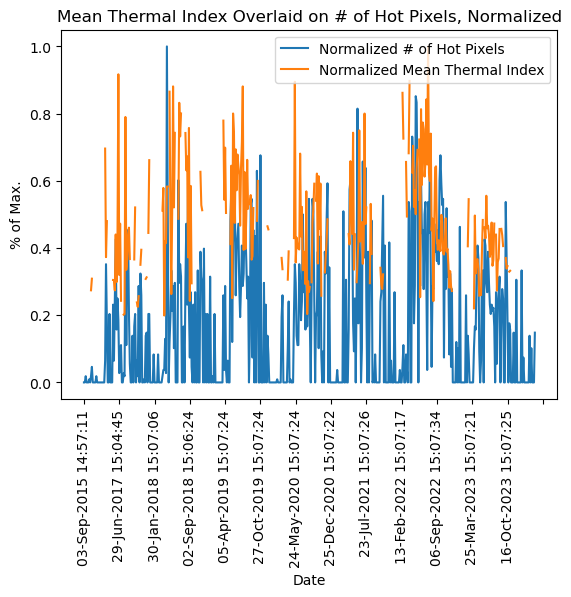

In [77]:
plt.plot(df['N Hot Pixel'] / max(df['N Hot Pixel']), label='Normalized # of Hot Pixels')
plt.plot(df['meanTI'] / np.nanmax(df['meanTI']), label='Normalized Mean Thermal Index')

plt.title('Mean Thermal Index Overlaid on # of Hot Pixels, Normalized')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xlabel('Date')
plt.ylabel('% of Max.')
plt.legend()
plt.show()

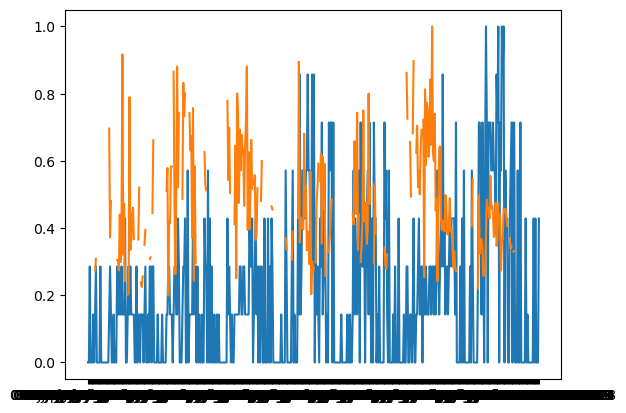

In [81]:
plt.plot(df['N Cluster'] /  np.nanmax(df['N Cluster']))
plt.plot(df['meanTI'] / np.nanmax(df['meanTI']))

C:\Users\sahny\AppData\Local\Temp\ipykernel_11360\2781870292.py:16: RuntimeWarning: Mean of empty slice
  A[m0] = np.nanmean(var_list)


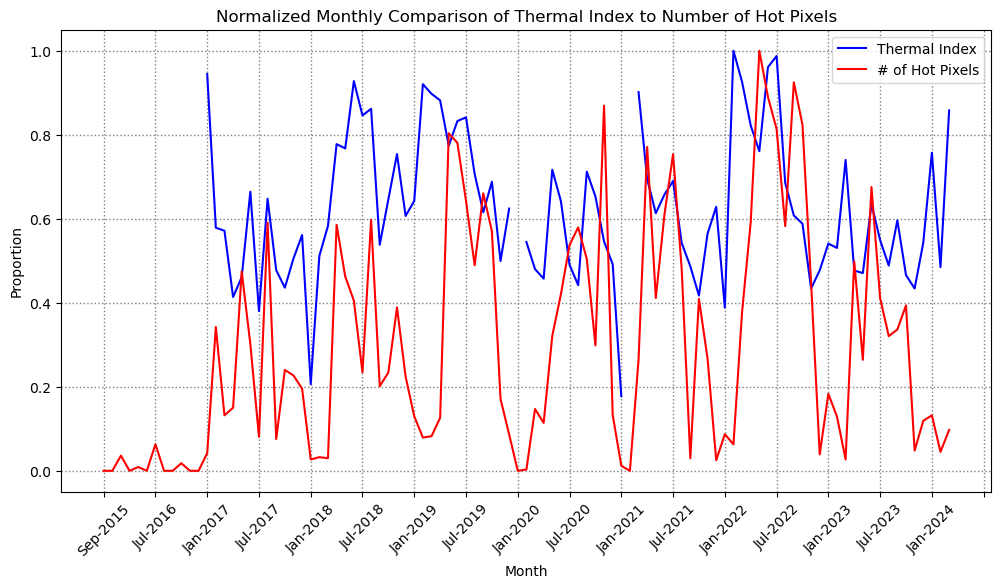

In [199]:
plt.figure(figsize=(12,6))
plt.plot(monthly_avg('meanTI') / np.nanmax(monthly_avg('meanTI')), c='b', label='Thermal Index')
plt.plot(monthly_avg('N Hot Pixel') / np.nanmax(monthly_avg('N Hot Pixel')), c='r', label='# of Hot Pixels')
plt.title('Normalized Monthly Comparison of Thermal Index to Number of Hot Pixels')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.grid(color='gray', lw=1, ls='dotted')
plt.legend()
plt.show()

C:\Users\sahny\AppData\Local\Temp\ipykernel_11360\2781870292.py:16: RuntimeWarning: Mean of empty slice
  A[m0] = np.nanmean(var_list)


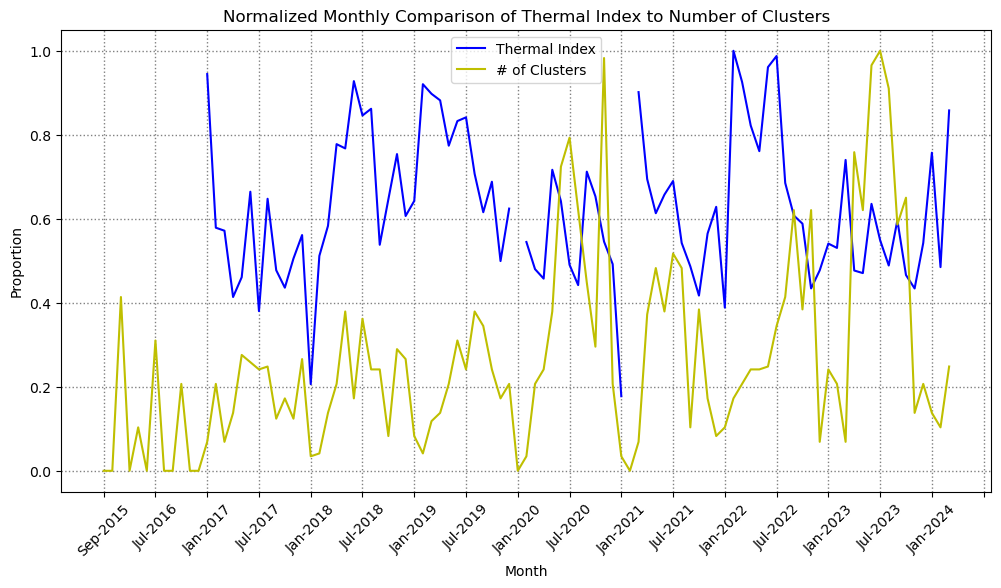

In [190]:
plt.figure(figsize=(12,6))
plt.plot(monthly_avg('meanTI') / np.nanmax(monthly_avg('meanTI')), c='b', label='Thermal Index')
plt.plot(monthly_avg('N Cluster') / np.nanmax(monthly_avg('N Cluster')), c='y', label='# of Clusters')
plt.title('Normalized Monthly Comparison of Thermal Index to Number of Clusters')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.grid(color='gray', lw=1, ls='dotted')
plt.legend()
plt.show()